In [40]:
import pandas as pd


In [41]:
unames=['user_id', 'gender','age','occupation','zip']
users=pd.read_table('/home/kirti/Desktop/users.dat',sep='::',header=None,names=unames)

In [42]:
rnames=['user_id', 'movie_id','rating','timestamp']
ratings=pd.read_table('/home/kirti/Desktop/ratings.dat',sep='::',header=None,names=rnames)

In [43]:
mnames=['movie_id','title','genres']
movies=pd.read_table('/home/kirti/Desktop/movies.dat',sep='::',header=None,names=mnames)

In [21]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [23]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [25]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
ratings


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [29]:
movies


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [31]:
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [52]:
data=pd.merge(pd.merge(users,ratings),movies)
data

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [58]:
data.loc[0]

user_id                                            1
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
movie_id                                        1193
rating                                             5
timestamp                                  978300760
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [56]:
 mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc='mean')

In [59]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [63]:
ratings_by_title=data.groupby('title').size()
ratings_by_title[:10]


title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [65]:
active_titles=ratings_by_title.index[ratings_by_title>=250]
active_titles


Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [71]:
top_female_ratings=mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:5]

gender,F,M
title,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000


In [79]:
mean_ratings['diff']=mean_ratings['M']-mean_ratings['F']
mean_ratings.sort_values(by='diff')
mean_ratings[:15]

gender,F,M,diff
title,,,
"$1,000,000 Duck (1971)",3.375000,2.761905,-0.613095
'Night Mother (1986),3.388889,3.352941,-0.035948
'Til There Was You (1997),2.675676,2.733333,0.057658
"'burbs, The (1989)",2.793478,2.962085,0.168607
...And Justice for All (1979),3.828571,3.689024,-0.139547
1-900 (1994),2.000000,3.000000,1.000000
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785


In [85]:
mean_ratings[::-1][:15]

gender,F,M,diff
title,,,
eXistenZ (1999),3.098592,3.289086,0.190494
Zeus and Roxanne (1997),2.777778,2.357143,-0.420635
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000,NaN
Zero Effect (1998),3.864407,3.723140,-0.141266
"Zed & Two Noughts, A (1985)",3.500000,3.380952,-0.119048
Zachariah (1971),NaN,3.500000,NaN
Your Friends and Neighbors (1998),2.888889,3.536585,0.647696
Young and Innocent (1937),2.500000,3.500000,1.000000
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362


In [94]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='title'>

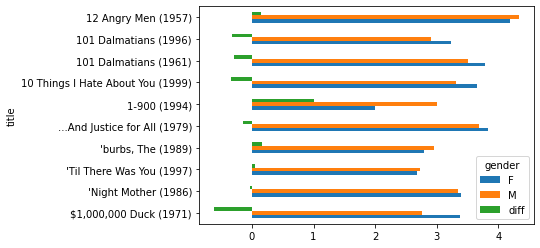

In [98]:
mean_ratings[:10].plot(kind='barh', rot=0)